linear fit: y=2.4167940151086604x + -0.7281813626011631
Pearson's r = 0.9999085380306849
SSE = 1.1425798816093495e-05
R-square = 0.9998170844266617
CI_half_width = 0.14404225426820572


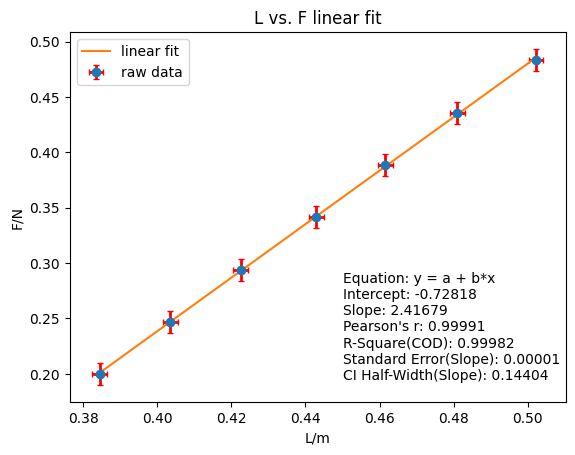

In [48]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

config={
    "text_x": 0.45,
    "text_y": 0.18,
    "title": "L vs. F linear fit",
    "label_x": "L/m",
    "label_y":"F/N"
}

def linear_fit(x,y,x_err,y_err):
    # error bar
    plt.errorbar(x,y,y_err,x_err,fmt="o",ecolor="r",elinewidth=2,capsize=2)
    
    # lieanr fit
    x_train=np.array(x).reshape((len(x),1))
    y_train=np.array(y).reshape((len(y),1))
    model=LinearRegression()
    model.fit(x_train,y_train)
    [slope,intercept]=[model.coef_[0][0], model.intercept_[0]]
    print(f"linear fit: y={slope}x + {intercept}");

    sm_model=sm.OLS(y_train,x_train).fit()

    # plot regression line
    x_fit=np.linspace(x[0],x[-1],10000)
    y_fit=slope*x_fit+intercept
    plt.plot(x_fit,y_fit)

    # basic plot set
    plt.title(config["title"])
    plt.xlabel(config["label_x"])
    plt.ylabel(config["label_y"])
    plt.legend(["linear fit","raw data"])

    # statistics 
    y_pred=x_train*slope+intercept

    pearson_r=np.corrcoef(x,y)[0,1]
    sse=np.sum((y_pred-y_train)**2)
    r_squared=1 - np.sum((y_train - y_pred)**2) / np.sum((y_train - np.mean(y_train))**2)
    confidence_interval=sm_model.conf_int(alpha=0.05) # set confidence 0.95
    ci_half_width=(confidence_interval[0][1]-confidence_interval[0][0])/2

    print(f"Pearson's r = {pearson_r}")
    print(f"SSE = {sse}")
    print(f"R-square = {r_squared}")
    print(f"CI_half_width = {ci_half_width}")

    # statistics plot
    text_str="Equation: y = a + b*x\n"
    text_str+="Intercept: {0:.5f}\n".format(intercept)
    text_str+="Slope: {0:.5f}\n".format(slope)
    text_str+="Pearson's r: {0:.5f}\n".format(pearson_r)
    text_str+="R-Square(COD): {0:.5f}\n".format(r_squared)
    text_str+="Standard Error(Slope): {0:.5f}\n".format(sse)
    text_str+="CI Half-Width(Slope): {0:.5f}\n".format(ci_half_width)

    plt.text(config["text_x"],config["text_y"],text_str)


    plt.show()


L=[0.38450,0.40350,0.42250,0.44290,0.46150,0.48100,0.50220]
F=[0.2,0.2469,0.2939,0.3416,0.3888,0.4356,0.4834]
L_err=[0.002,0.002,0.002,0.002,0.002,0.002,0.002]
F_err=[0.01,0.01,0.01,0.01,0.01,0.01,0.01]

linear_fit(L,F,L_err,F_err)